In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_excel('Indegene_Analytics_Case Study_Data_V2.01_Q&A-1.xlsx', sheet_name = 'Data')

df.rename(columns={
    'GROUP (ATC 3)': 'GROUP',
    'Grp_ID (ATC 3)': 'Grp_ID',
    'SUBGROUP (ATC4)': 'SUBGROUP',
    'sub_grp_ID (ATC4)': 'sub_grp_ID',
    'STA_Sales - (MAT Jun-2018) - INR in Crs.': 'STA_Sales_2018',
    'Forecasted Sales 2022 - INR in Crs.': 'Forecasted_Sales_2022',
    'Incremental_Sales - INR in Crs.': 'Incremental_Sales',
    'Projected_grwth (2019-22)': 'Projected_Growth_2019_22',
    'CAGR Size (2015-18)': 'CAGR_Size_2015_18',
    'Forecasted Price - INR': 'Forecasted_Price_2022',
    'Grp Price': 'Grp_Price'
}, inplace=True)


df.head()



,GROUP,Grp_ID,SUBGROUP,sub_grp_ID,STA_Sales_2018,Forecasted_Sales_2022,Incremental_Sales,Projected_Growth_2019_22,CAGR_Size_2015_18,No_Comp,...,%_Tender,%_GPs,%_Spec_SSP,%_Urban,%_Rural,GP,SP,SSP,Grp_Price,launch_date
0,A01A STOMATOLOGICALS,A01A,A01A1 STOMATOLOGICALS,A01A1,296.861663,442.659747,27.012559,0.098203,0.153784,96,...,0.0001,0.127966,0.872034,0.593534,0.406466,600608,3184271,908607,33.722151,Dec-1981
1,A02A ANTACID-ANTIFLATULENTS,A02A,A02A1 PLAIN ANTACIDS,A02A1,15.057035,27.296883,4.125221,0.166406,0.314056,14,...,0.0001,0.271352,0.728648,0.493633,0.506367,34227,11754,80154,19.906084,Apr-1990
2,A02A ANTACID-ANTIFLATULENTS,A02A,A02A2 PLAIN ANTIFLATULENTS,A02A2,28.557433,35.081516,2.314515,0.051933,0.074245,15,...,0.0001,0.436204,0.563796,0.570522,0.429478,52748,11621,56556,19.906084,Aug-1971
3,A02A ANTACID-ANTIFLATULENTS,A02A,A02A3 ANTACID+ANTISPASMODICS,A02A3,0.111323,0.209461,-0.060996,0.054346,0.427054,5,...,0.0001,0.202532,0.797468,0.471245,0.528755,208,191,628,19.906084,Sep-1995
4,A02A ANTACID-ANTIFLATULENTS,A02A,A02A4 ANTACID+ANTIFLATU.SOLIDS,A02A4,86.628262,95.435362,-2.102557,0.018939,0.022096,45,...,0.0001,0.286682,0.713318,0.594311,0.405689,122120,70776,233081,19.906084,Mar-1972


In [9]:


def plot_therapeutic_areas_performance(df):
    atc_mapping = {
        'A': 'Alimentary tract and metabolism',
        'B': 'Blood and blood forming organs',
        'C': 'Cardiovascular system',
        'D': 'Dermatologicals',
        'G': 'Genito-urinary system and sex hormones',
        'H': 'Systemic hormonal preparations, excluding sex hormones and insulins',
        'J': 'Antiinfectives for systemic use',
        'L': 'Antineoplastic and immunomodulating agents',
        'M': 'Musculo-skeletal system',
        'N': 'Nervous system',
        'P': 'Antiparasitic products, insecticides and repellents',
        'R': 'Respiratory system',
        'S': 'Sensory organs',
        'V': 'Various'
    }

    atc3_performance = df.groupby('GROUP').agg({
        'STA_Sales_2018': 'sum',
        'Forecasted_Sales_2022': 'sum',
        'Incremental_Sales': 'sum',
        'Projected_Growth_2019_22': 'mean',
        'CAGR_Size_2015_18': 'mean',
        'No_Comp': 'sum',
        'MS_top5_comp': 'mean'
    }).reset_index()

    atc3_performance['Therapy_Area'] = atc3_performance['GROUP'].apply(lambda x: atc_mapping.get(x[0], 'Unknown'))

    plt.figure(figsize=(12, 6))
    fig, ax1 = plt.subplots(figsize=(12, 6))
    sns.barplot(x='Therapy_Area', y='STA_Sales_2018', data=atc3_performance, color='blue', label='STA_Sales_2018', ax=ax1)
    ax1.set_ylabel('STA_Sales_2018 (INR in Crs.)', color='blue')
    #ax1.tick_params(axis='y', labelcolor='red')
    ax2 = ax1.twinx()
    sns.lineplot(x='Therapy_Area', y='Forecasted_Sales_2022', data=atc3_performance, color='orange', marker='o', label='Forecasted_Sales_2022', ax=ax2)
    ax2.set_ylabel('Forecasted_Sales_2022 (INR in Crs.)', color='orange')
    ax2.tick_params(axis='y', labelcolor='orange')
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor')
    plt.title('Therapeutic Areas Performance (ATC 3)')
    plt.tight_layout()
    plt.show()
    print('Therapeutic Areas Performance (ATC 3) :')
    #     print('Note - Top, ', b, 'rows has been printed')
    
    atc3_performance_ = atc3_performance.groupby('Therapy_Area').agg({
        'STA_Sales_2018': 'sum',
        'Forecasted_Sales_2022': 'sum',
        'Incremental_Sales': 'sum',
        'Projected_Growth_2019_22': 'mean',
        'CAGR_Size_2015_18': 'mean',
        'No_Comp': 'sum',
        'MS_top5_comp': 'mean'
    }).reset_index()    
    
    return atc3_performance_


<Figure size 1200x600 with 0 Axes>

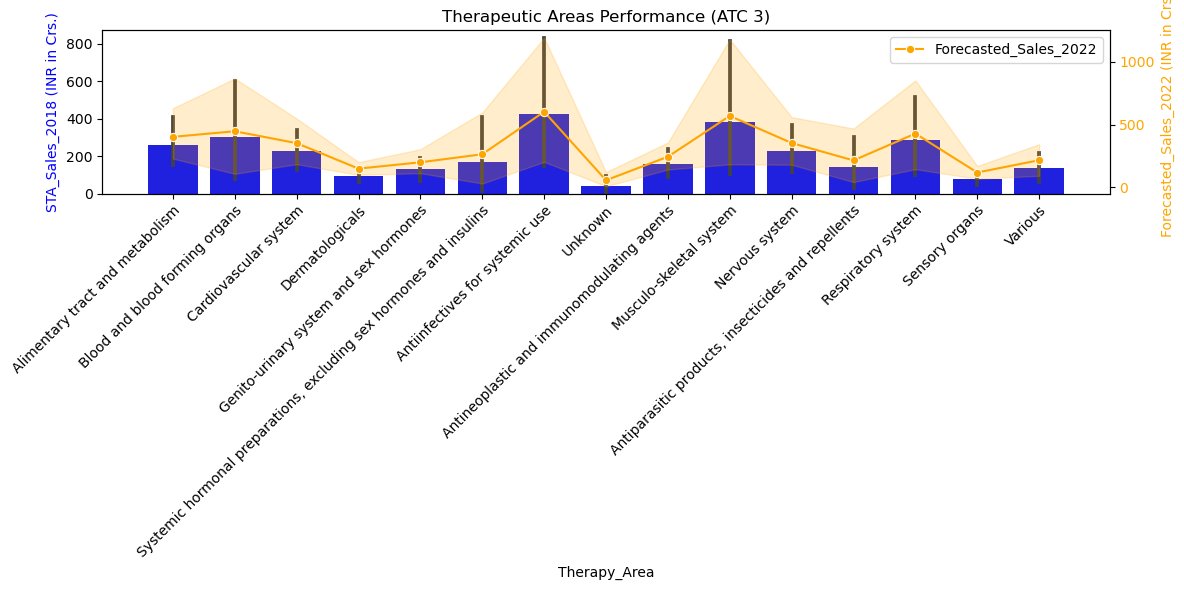

Therapeutic Areas Performance (ATC 3) :


,Therapy_Area,STA_Sales_2018,Forecasted_Sales_2022,Incremental_Sales,Projected_Growth_2019_22,CAGR_Size_2015_18,No_Comp,MS_top5_comp
0,Alimentary tract and metabolism,13403.201755,20514.136410,1749.188089,0.059893,0.129081,6467,0.902266
1,Antiinfectives for systemic use,10677.843546,15072.409282,1089.114043,0.059463,0.185164,4621,0.886172
2,Antineoplastic and immunomodulating agents,480.827490,730.692910,26.772489,0.053138,0.141777,312,0.895966
3,"Antiparasitic products, insecticides and repel...",724.867417,1070.099859,103.037670,-0.027129,0.074713,536,0.951055
4,Blood and blood forming organs,2425.951845,3575.172064,270.140872,0.038667,0.088916,1141,0.855879
5,Cardiovascular system,5731.222834,8799.858176,688.661993,0.035719,0.113401,2114,0.930633
6,Dermatologicals,2913.076050,4456.466033,354.235943,0.040215,0.107144,2128,0.891356
7,Genito-urinary system and sex hormones,2208.994818,3385.093259,229.757030,0.064300,0.120067,980,0.925700
8,Musculo-skeletal system,3812.075973,5695.303917,420.460470,0.074281,0.125485,2748,0.767226
9,Nervous system,3898.518038,6001.466591,488.916702,0.105379,0.211007,2242,0.934626


In [10]:
plot_therapeutic_areas_performance(df)

In [6]:

def high_potential_molecules_analysis(df, b):
    
    atc_mapping = {
        'A': 'Alimentary tract and metabolism',
        'B': 'Blood and blood forming organs',
        'C': 'Cardiovascular system',
        'D': 'Dermatologicals',
        'G': 'Genito-urinary system and sex hormones',
        'H': 'Systemic hormonal preparations, excluding sex hormones and insulins',
        'J': 'Antiinfectives for systemic use',
        'L': 'Antineoplastic and immunomodulating agents',
        'M': 'Musculo-skeletal system',
        'N': 'Nervous system',
        'P': 'Antiparasitic products, insecticides and repellents',
        'R': 'Respiratory system',
        'S': 'Sensory organs',
        'V': 'Various'
    }    
    df['Therapy_Area'] = df['GROUP'].apply(lambda x: atc_mapping.get(x[0], 'Unknown'))
    top_subgroups = df.nlargest(10, 'STA_Sales_2018')['SUBGROUP']
    df_top10 = df[df['SUBGROUP'].isin(top_subgroups)]

    plt.figure(figsize=(14, 6))
    sns.barplot(x='SUBGROUP', y='STA_Sales_2018', hue='Therapy_Area', data=df_top10, palette='viridis')
    plt.yscale('log')
    plt.ylabel('Sales (INR in Crs.) - Log Scale')
    plt.title('Top 10 Subgroups based on STA_Sales_2018')
    plt.legend(title='Therapy Area (ATC 3)', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    print('Top 10 Subgroups based on STA_Sales_2018')
    return df_top10.head(b)


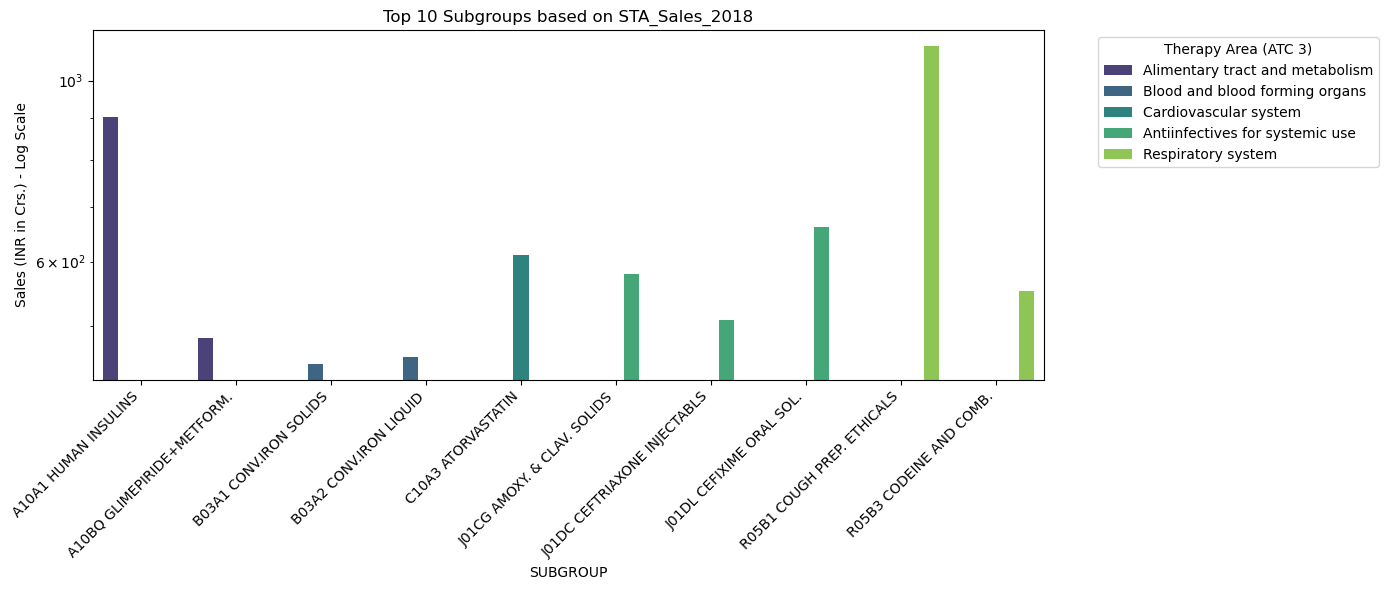

Top 10 Subgroups based on STA_Sales_2018


,GROUP,Grp_ID,SUBGROUP,sub_grp_ID,STA_Sales_2018,Forecasted_Sales_2022,Incremental_Sales,Projected_Growth_2019_22,CAGR_Size_2015_18,No_Comp,...,%_GPs,%_Spec_SSP,%_Urban,%_Rural,GP,SP,SSP,Grp_Price,launch_date,Therapy_Area
199,A10A INSULINS,A10A,A10A1 HUMAN INSULINS,A10A1,903.162285,1439.886877,162.342111,0.125605,0.198967,13,...,0.426434,0.573566,0.701939,0.298061,323727,375632,59791,151.171079,Apr-1992,Alimentary tract and metabolism
225,A10B ORAL ANTIDIABETICS,A10B,A10BQ GLIMEPIRIDE+METFORM.,A10BQ,483.432758,894.649922,116.141401,0.159334,0.381985,64,...,0.436896,0.563104,0.694831,0.305169,688657,629573,258018,34.823749,May-2002,Alimentary tract and metabolism
319,B03A HAEMATINICS-IRON+COMB,B03A,B03A1 CONV.IRON SOLIDS,B03A1,449.634318,683.029084,59.670908,0.105026,0.180740,186,...,0.544008,0.455992,0.650302,0.349698,1944695,493562,1136500,49.339104,May-1967,Blood and blood forming organs
320,B03A HAEMATINICS-IRON+COMB,B03A,B03A2 CONV.IRON LIQUID,B03A2,458.389479,662.732147,44.566778,0.091050,0.140076,153,...,0.482249,0.517751,0.454630,0.545370,847987,180913,729501,49.339104,Jul-1977,Blood and blood forming organs
482,C10A STATINS,C10A,C10A3 ATORVASTATIN,C10A3,611.680899,933.772202,51.253780,0.099099,0.177891,74,...,0.387946,0.612054,0.714531,0.285469,570924,703056,197679,62.042859,Sep-1999,Cardiovascular system
778,J01C AMPICILLIN/AMOXYCILLIN,J01C,J01CG AMOXY. & CLAV. SOLIDS,J01CG,580.070325,1055.024714,141.697403,0.156117,0.367067,91,...,0.256589,0.743411,0.619713,0.380287,941803,1273760,1454910,43.643869,Jan-1994,Antiinfectives for systemic use
801,J01D CEPHALOSPORINS,J01D,J01DC CEFTRIAXONE INJECTABLS,J01DC,508.224709,745.833561,74.067023,0.102186,0.153169,82,...,0.403736,0.596264,0.455319,0.544681,246797,73159,291327,53.715055,Feb-1987,Antiinfectives for systemic use
810,J01D CEPHALOSPORINS,J01D,J01DL CEFIXIME ORAL SOL.,J01DL,661.863890,1062.522368,77.469865,0.112921,0.219616,99,...,0.264558,0.735442,0.469016,0.530984,1140858,591984,2579482,53.715055,May-1994,Antiinfectives for systemic use
1322,R05B COUGH PREPARATIONS,R05B,R05B1 COUGH PREP. ETHICALS,R05B1,1102.174786,1633.101912,127.073634,0.103252,0.141505,274,...,0.366175,0.633825,0.516463,0.483537,3102567,900448,4469904,35.966638,Oct-1973,Respiratory system
1324,R05B COUGH PREPARATIONS,R05B,R05B3 CODEINE AND COMB.,R05B3,551.658697,884.245103,-3.459191,0.188264,0.140222,66,...,0.309574,0.690426,0.552574,0.447426,313480,137953,561183,35.966638,Dec-1981,Respiratory system


In [7]:
high_potential_molecules_analysis(df, 100)

In [8]:

def projected_revenue_analysis(df):
    projected_revenue_2022 = df.groupby('Therapy_Area').agg({
        'Forecasted_Sales_2022': 'sum'
    }).reset_index()

    plt.figure(figsize=(12, 8))
    sns.barplot(x='Therapy_Area', y='Forecasted_Sales_2022', data=projected_revenue_2022, color='green')
    plt.ylabel('Projected Revenue in 2022 (INR in Crs.)')
    plt.title('Projected Revenue in 2022 by Therapeutic Area (ATC 3)')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    print('Projected Revenue in 2022 by Therapeutic Area (ATC 3)')
    return projected_revenue_2022


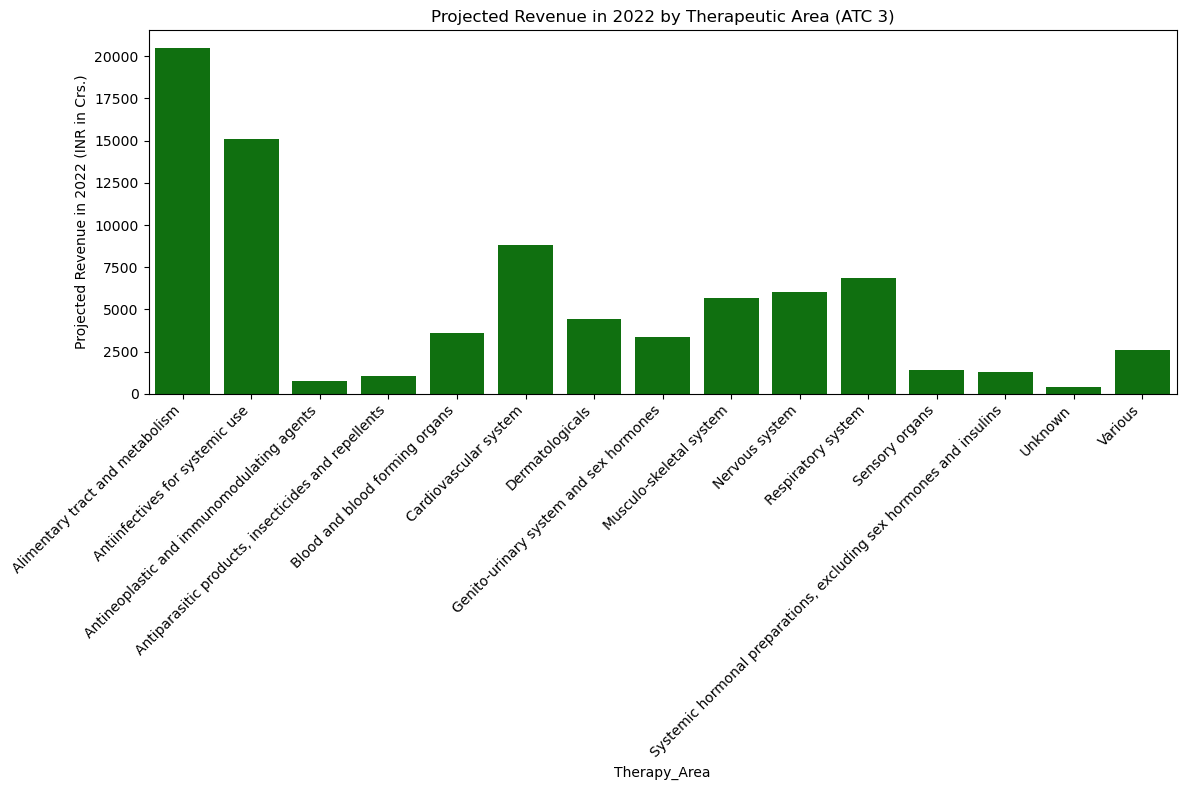

Projected Revenue in 2022 by Therapeutic Area (ATC 3)


,Therapy_Area,Forecasted_Sales_2022
0,Alimentary tract and metabolism,20514.136410
1,Antiinfectives for systemic use,15072.409282
2,Antineoplastic and immunomodulating agents,730.692910
3,"Antiparasitic products, insecticides and repel...",1070.099859
4,Blood and blood forming organs,3575.172064
5,Cardiovascular system,8799.858176
6,Dermatologicals,4456.466033
7,Genito-urinary system and sex hormones,3385.093259
8,Musculo-skeletal system,5695.303917
9,Nervous system,6001.466591


In [9]:
projected_revenue_analysis(df)

In [10]:

def market_share_analysis(df, b):
    market_share_analysis = df.groupby(['Therapy_Area']).agg({
        'MS_top5_comp': 'mean',
        'Avg_price': 'mean'
    }).reset_index()

    plt.figure(figsize=(14, 6))
    sns.scatterplot(x='Avg_price', y='MS_top5_comp', hue='Therapy_Area', data=market_share_analysis, palette='Set2')
    plt.xlabel('Average Price (INR)')
    plt.ylabel('Market Share of Top 5 Competitors')
    plt.title('Market Share vs Average Price Analysis')
    plt.legend(title='Therapeutic Area (ATC 3)', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()
    print('Market Share vs Average Price Analysis')
    return df.head(b)


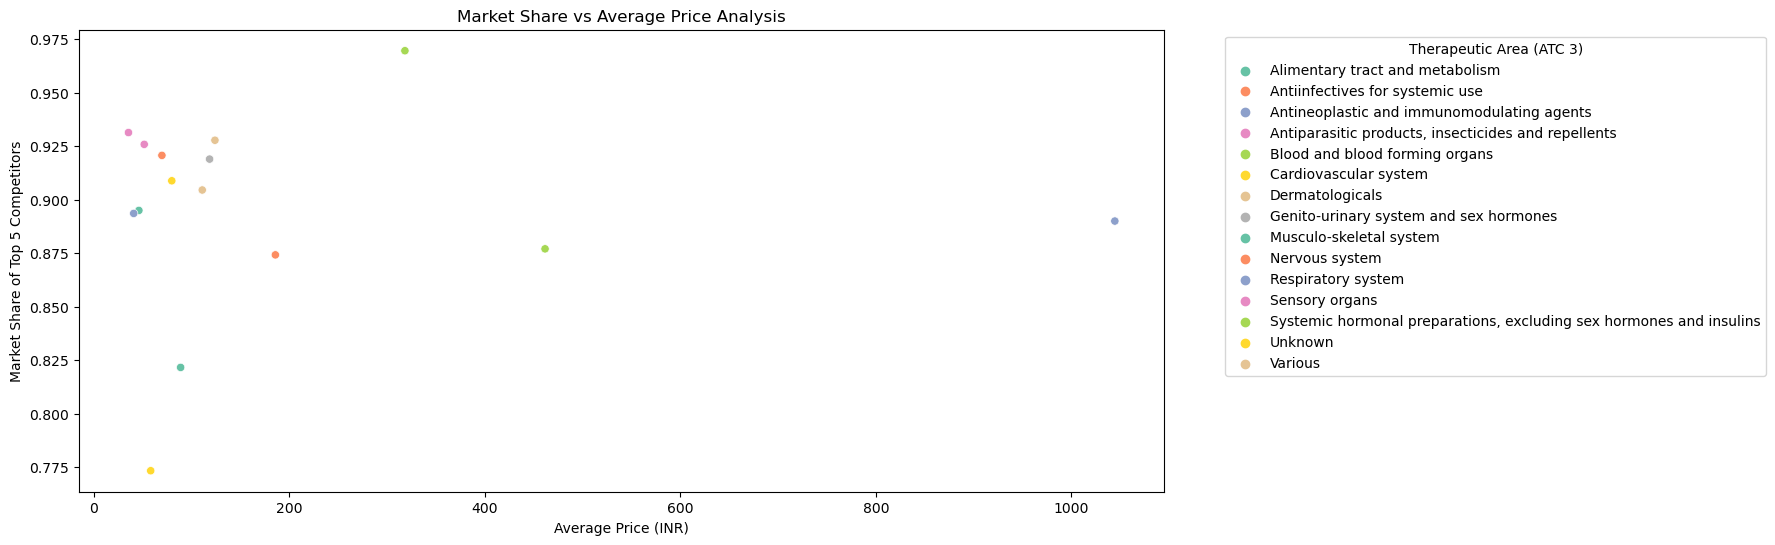

Market Share vs Average Price Analysis


,GROUP,Grp_ID,SUBGROUP,sub_grp_ID,STA_Sales_2018,Forecasted_Sales_2022,Incremental_Sales,Projected_Growth_2019_22,CAGR_Size_2015_18,No_Comp,...,%_GPs,%_Spec_SSP,%_Urban,%_Rural,GP,SP,SSP,Grp_Price,launch_date,Therapy_Area
0,A01A STOMATOLOGICALS,A01A,A01A1 STOMATOLOGICALS,A01A1,296.861663,442.659747,27.012559,0.098203,0.153784,96,...,0.127966,0.872034,0.593534,0.406466,600608,3184271,908607,33.722151,Dec-1981,Alimentary tract and metabolism
1,A02A ANTACID-ANTIFLATULENTS,A02A,A02A1 PLAIN ANTACIDS,A02A1,15.057035,27.296883,4.125221,0.166406,0.314056,14,...,0.271352,0.728648,0.493633,0.506367,34227,11754,80154,19.906084,Apr-1990,Alimentary tract and metabolism
2,A02A ANTACID-ANTIFLATULENTS,A02A,A02A2 PLAIN ANTIFLATULENTS,A02A2,28.557433,35.081516,2.314515,0.051933,0.074245,15,...,0.436204,0.563796,0.570522,0.429478,52748,11621,56556,19.906084,Aug-1971,Alimentary tract and metabolism
3,A02A ANTACID-ANTIFLATULENTS,A02A,A02A3 ANTACID+ANTISPASMODICS,A02A3,0.111323,0.209461,-0.060996,0.054346,0.427054,5,...,0.202532,0.797468,0.471245,0.528755,208,191,628,19.906084,Sep-1995,Alimentary tract and metabolism
4,A02A ANTACID-ANTIFLATULENTS,A02A,A02A4 ANTACID+ANTIFLATU.SOLIDS,A02A4,86.628262,95.435362,-2.102557,0.018939,0.022096,45,...,0.286682,0.713318,0.594311,0.405689,122120,70776,233081,19.906084,Mar-1972,Alimentary tract and metabolism
5,A02A ANTACID-ANTIFLATULENTS,A02A,A02A5 ANTACID+ANTIFLATU.LIQ,A02A5,197.799567,294.326872,27.147077,0.105022,0.154935,94,...,0.403604,0.596396,0.538657,0.461343,490495,172174,552620,19.906084,Mar-1972,Alimentary tract and metabolism
6,A02A ANTACID-ANTIFLATULENTS,A02A,A02A6 ANTACID+OTHER DRUGS,A02A6,102.005567,156.037342,17.696475,0.115530,0.176621,33,...,0.364561,0.635439,0.571219,0.428781,307554,137580,398495,19.906084,Jan-1987,Alimentary tract and metabolism
7,A02A ANTACID-ANTIFLATULENTS,A02A,A02A7 ANTIFLATULENT+OTH.DRUGS,A02A7,46.976378,59.456911,-1.820655,0.047241,0.067282,34,...,0.456306,0.543694,0.498742,0.501258,167907,25285,174778,19.906084,Jan-1973,Alimentary tract and metabolism
8,A02B ANTIPEPTIC ULCERANTS,A02B,A02B1 RANITIDINE ORAL SOLIDS,A02B1,307.783894,441.017393,40.110211,0.094754,0.135270,65,...,0.232236,0.767764,0.459427,0.540573,563336,619032,1243338,20.345380,Sep-1985,Alimentary tract and metabolism
9,A02B ANTIPEPTIC ULCERANTS,A02B,A02B3 RANITIDINE INJECTABLES,A02B3,43.029958,63.033721,4.210630,0.098328,0.149155,35,...,0.385262,0.614738,0.446942,0.553058,152688,46709,196926,20.345380,Sep-1985,Alimentary tract and metabolism


In [11]:
market_share_analysis(df, 20)

In [12]:

def subgroup_level_analysis(df):
    subgroup_performance = df.groupby(['Therapy_Area', 'SUBGROUP']).agg({
        'STA_Sales_2018': 'sum',
        'Forecasted_Sales_2022': 'sum',
        'Incremental_Sales': 'sum',
        'Projected_Growth_2019_22': 'mean',
        'CAGR_Size_2015_18': 'mean',
        'No_Comp': 'sum',
        'MS_top5_comp': 'mean'
    }).reset_index()

    
    
    subgroup_performance_sorted = subgroup_performance.sort_values(by=['Therapy_Area', 'Forecasted_Sales_2022'], ascending=[True, False])
    top_subgroups = subgroup_performance_sorted.groupby('Therapy_Area').head(1)

    plt.figure(figsize=(14, 6))
    sns.barplot(x='SUBGROUP', y='Forecasted_Sales_2022', hue='Therapy_Area', data=top_subgroups, palette='viridis')
    plt.yscale('log')
    plt.ylabel('Forecasted Sales 2022 (INR in Crs.) - Log Scale')
    plt.title('Top Performing Subgroup Across Each Therapy Area')
    plt.legend(title='Therapy Area (ATC 3)', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    print("Top Performing Subgroup Across Each Therapy Area")
    
    
    return top_subgroups
#(subgroup_performance.sort_values(by=['Therapy_Area', 'Forecasted_Sales_2022'], ascending=[True, False]))


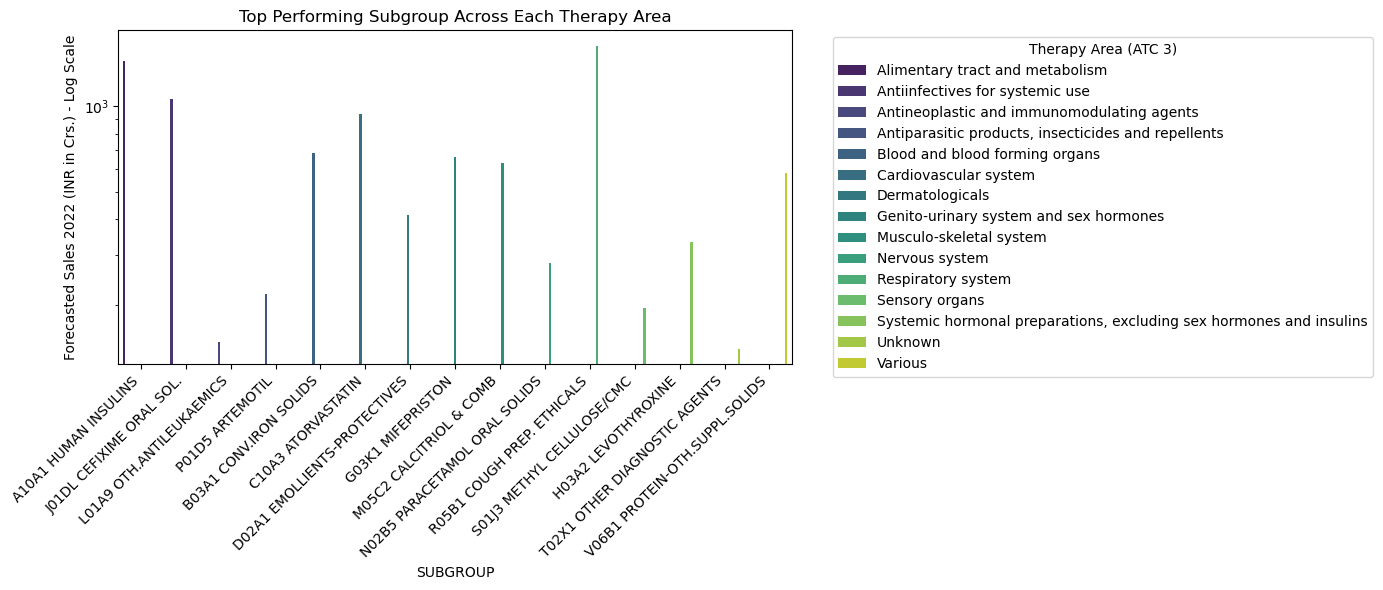

Top Performing Subgroup Across Each Therapy Area


,Therapy_Area,SUBGROUP,STA_Sales_2018,Forecasted_Sales_2022,Incremental_Sales,Projected_Growth_2019_22,CAGR_Size_2015_18,No_Comp,MS_top5_comp
199,Alimentary tract and metabolism,A10A1 HUMAN INSULINS,903.162285,1439.886877,162.342111,0.125605,0.198967,13,0.954122
342,Antiinfectives for systemic use,J01DL CEFIXIME ORAL SOL.,661.863890,1062.522368,77.469865,0.112921,0.219616,99,0.510200
483,Antineoplastic and immunomodulating agents,L01A9 OTH.ANTILEUKAEMICS,87.457899,148.060817,17.610828,0.144342,0.257779,31,0.732024
525,"Antiparasitic products, insecticides and repel...",P01D5 ARTEMOTIL,127.365710,217.225235,30.949435,0.134934,0.335635,37,0.797190
564,Blood and blood forming organs,B03A1 CONV.IRON SOLIDS,449.634318,683.029084,59.670908,0.105026,0.180740,186,0.468048
727,Cardiovascular system,C10A3 ATORVASTATIN,611.680899,933.772202,51.253780,0.099099,0.177891,74,0.532136
768,Dermatologicals,D02A1 EMOLLIENTS-PROTECTIVES,242.862123,413.409339,33.572014,0.131488,0.257229,95,0.380603
970,Genito-urinary system and sex hormones,G03K1 MIFEPRISTON,368.344762,659.209918,57.965803,0.144834,0.302664,26,0.949820
1061,Musculo-skeletal system,M05C2 CALCITRIOL & COMB,361.830761,631.495112,57.012902,0.136064,0.301279,83,0.524906
1075,Nervous system,N02B5 PARACETAMOL ORAL SOLIDS,193.118890,280.273522,18.736844,0.093840,0.136200,113,0.720582


In [13]:
subgroup_level_analysis(df)

In [14]:

def geographical_analysis(df):
    geographical_analysis = df.groupby(['Therapy_Area']).agg({
        '%_Urban': 'mean',
        '%_Rural': 'mean'
    }).reset_index()

    plt.figure(figsize=(18, 8))
    sns.barplot(x='Therapy_Area', y='%_Urban', data=geographical_analysis, label='%_Urban', color='skyblue')
    sns.barplot(x='Therapy_Area', y='%_Rural', data=geographical_analysis, label='%_Rural', color='salmon')
    plt.ylabel('Percentage of Sales')
    plt.title('Geographical Analysis - Urban and Rural Sales Contribution by Therapy Area')
    plt.legend(title='Area', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45, ha='right')
    plt.show()

    print("Geographical Analysis - Urban and Rural Sales Contribution by Therapy Area:")
    return geographical_analysis


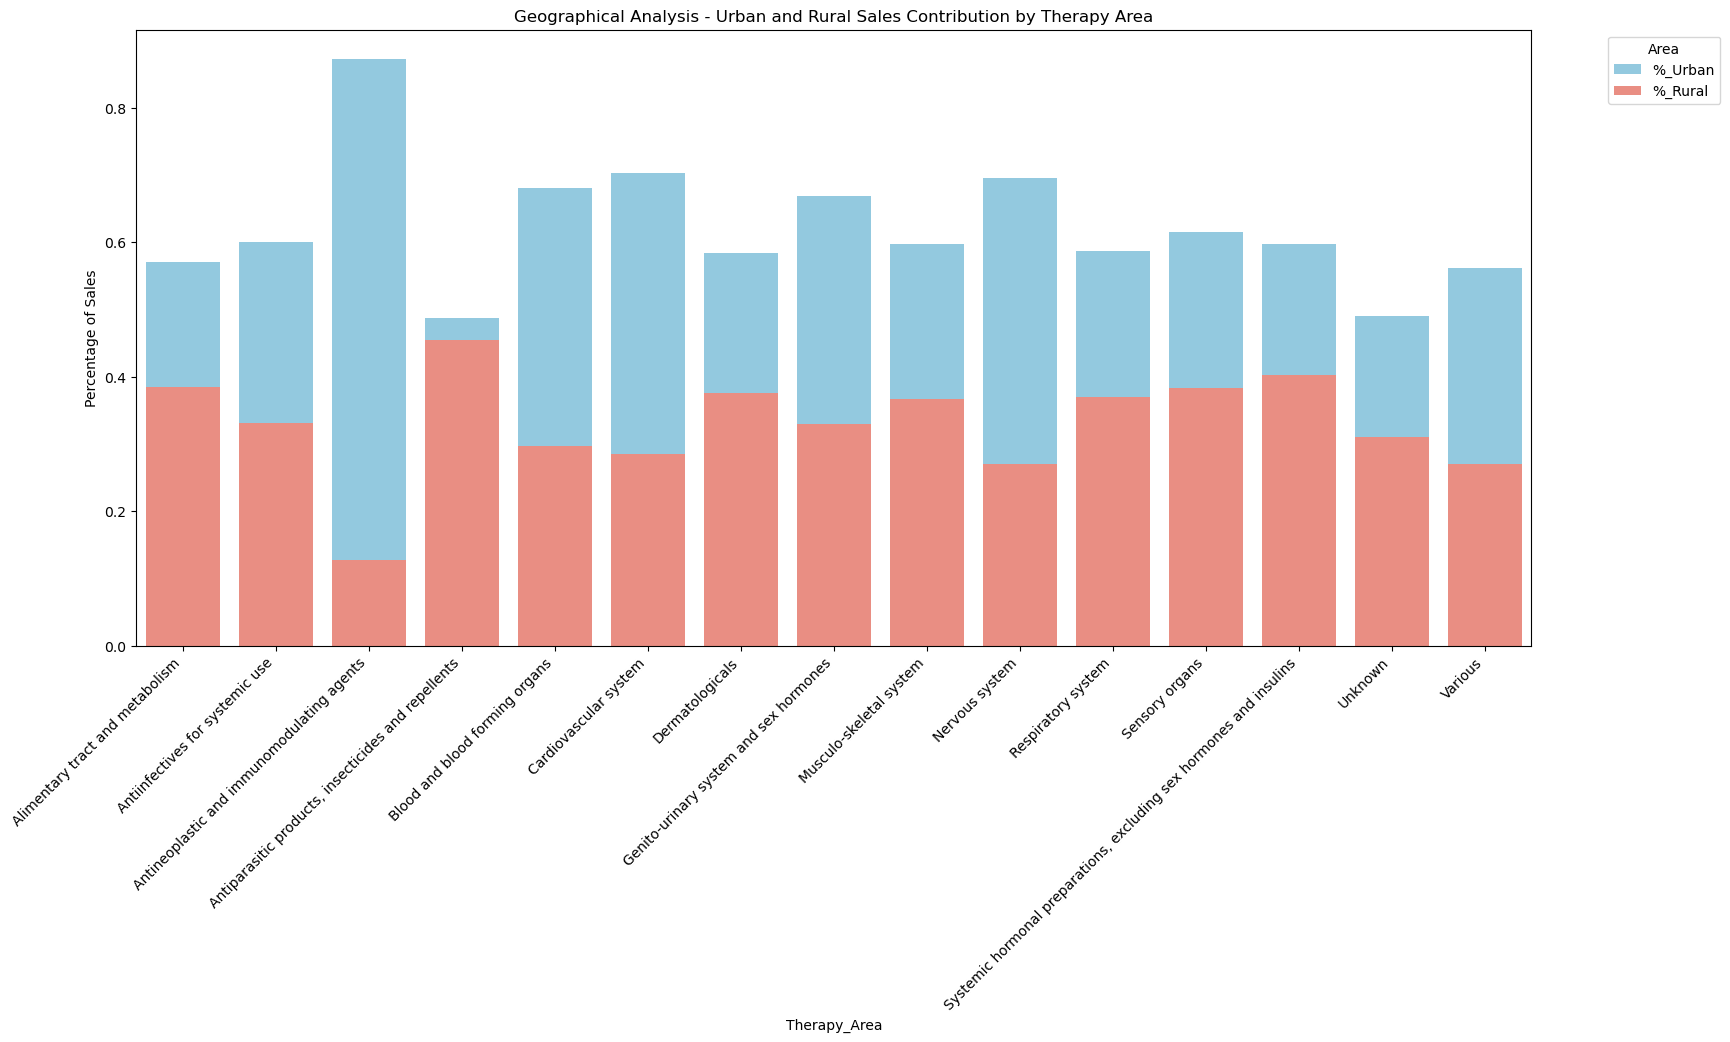

Geographical Analysis - Urban and Rural Sales Contribution by Therapy Area:


,Therapy_Area,%_Urban,%_Rural
0,Alimentary tract and metabolism,0.570449,0.384412
1,Antiinfectives for systemic use,0.600385,0.331194
2,Antineoplastic and immunomodulating agents,0.872676,0.127324
3,"Antiparasitic products, insecticides and repel...",0.488180,0.454677
4,Blood and blood forming organs,0.681207,0.297517
5,Cardiovascular system,0.702708,0.285097
6,Dermatologicals,0.584759,0.376135
7,Genito-urinary system and sex hormones,0.669427,0.330573
8,Musculo-skeletal system,0.598151,0.366555
9,Nervous system,0.695111,0.270167


In [15]:
geographical_analysis(df)

In [16]:

def therapeutic_area_growth_correlation(df):
    therapeutic_growth_corr = df.groupby('Therapy_Area').agg({
        'Forecasted_Sales_2022': 'mean',
        'Projected_Growth_2019_22': 'mean',
        'CAGR_Size_2015_18': 'mean'
    }).reset_index()

    plt.figure(figsize=(14, 6))
    sns.heatmap(therapeutic_growth_corr.corr(), annot=True, cmap='coolwarm', fmt=".2f",
                xticklabels=therapeutic_growth_corr.columns, yticklabels=therapeutic_growth_corr.columns)
    plt.title('Correlation Matrix: Therapeutic Area Growth Metrics')
    plt.show()

    print("Therapeutic Area Growth Metrics:")
    return (therapeutic_growth_corr)


/var/folders/p_/mblnp4x963d7f01kgbzbk2rr0000gn/T/ipykernel_79913/1563370092.py:9: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(therapeutic_growth_corr.corr(), annot=True, cmap='coolwarm', fmt=".2f",


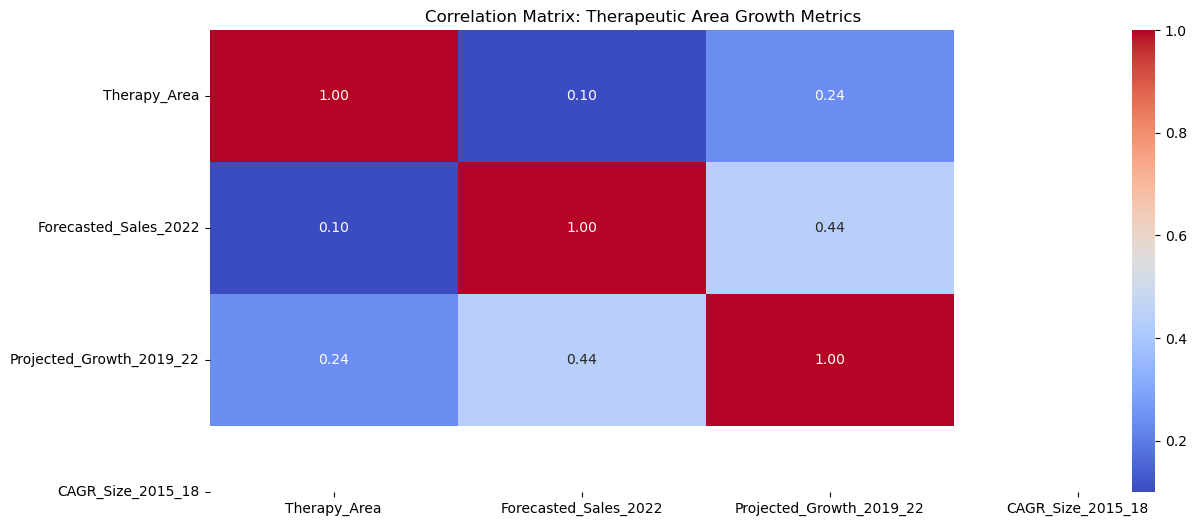

Therapeutic Area Growth Metrics:


,Therapy_Area,Forecasted_Sales_2022,Projected_Growth_2019_22,CAGR_Size_2015_18
0,Alimentary tract and metabolism,71.229640,0.062423,0.103709
1,Antiinfectives for systemic use,79.328470,0.023710,0.127846
2,Antineoplastic and immunomodulating agents,36.534645,0.049705,0.140597
3,"Antiparasitic products, insecticides and repel...",30.574282,0.038807,0.106798
4,Blood and blood forming organs,76.067491,0.015539,0.092113
5,Cardiovascular system,53.657672,0.030630,0.119082
6,Dermatologicals,24.896458,0.034902,0.068186
7,Genito-urinary system and sex hormones,57.374462,0.081764,0.152111
8,Musculo-skeletal system,67.003575,0.044298,0.118884
9,Nervous system,41.676851,0.095823,0.174221


In [17]:
therapeutic_area_growth_correlation(df)

In [18]:

def physician_count_analysis(df):
    physician_count_analysis = df.groupby(['Therapy_Area']).agg({
        'GP': 'sum',
        'SP': 'sum',
        'SSP': 'sum'
    }).reset_index()

    plt.figure(figsize=(18, 8))
    sns.barplot(x='Therapy_Area', y='GP', data=physician_count_analysis, color='blue', label='GP')
    sns.barplot(x='Therapy_Area', y='SP', data=physician_count_analysis, color='orange', label='SP')
    sns.barplot(x='Therapy_Area', y='SSP', data=physician_count_analysis, color='green', label='SSP')

    plt.ylabel('Physician Count')
    plt.title('Physician Count Analysis by Therapy Area')
    plt.legend(title='Physician Type', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45, ha='right')
    plt.show()

    print("Physician Count Analysis:")
    return (physician_count_analysis.sort_values(by=['Therapy_Area', 'GP'], ascending=[True, False]))


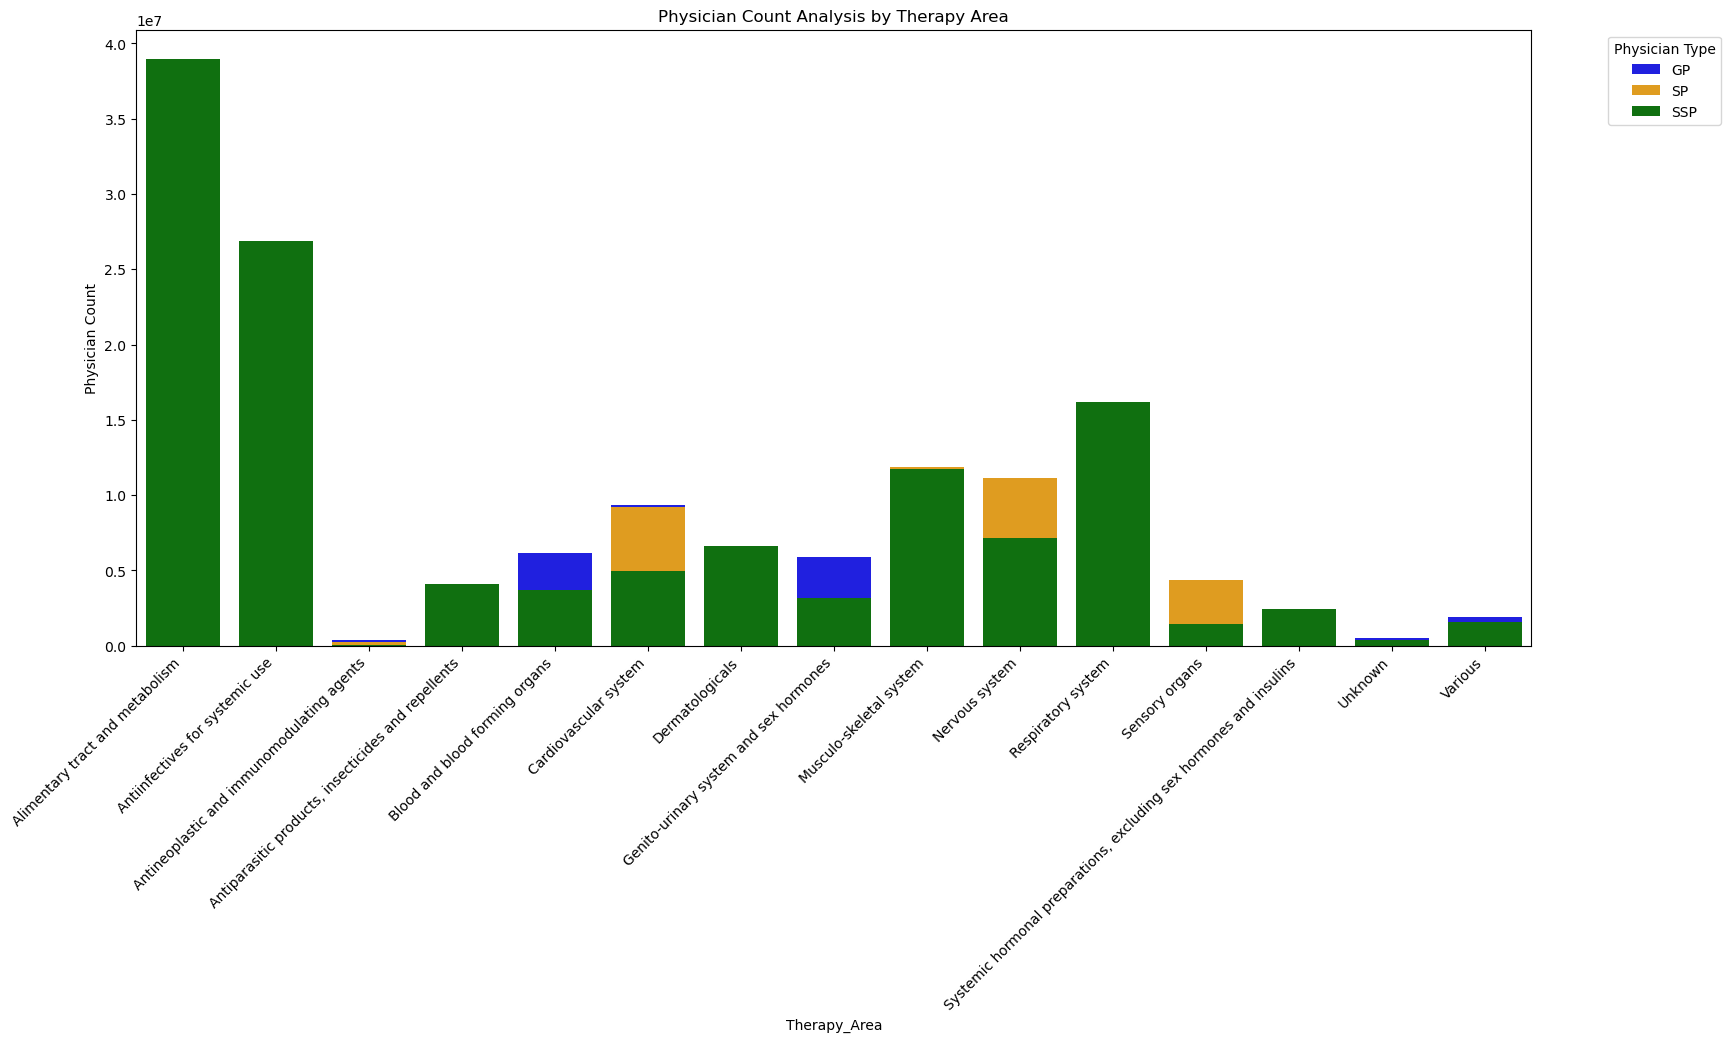

Physician Count Analysis:


,Therapy_Area,GP,SP,SSP
0,Alimentary tract and metabolism,34701582,24611932,38964188
1,Antiinfectives for systemic use,17453040,11744690,26856456
2,Antineoplastic and immunomodulating agents,373171,266092,73464
3,"Antiparasitic products, insecticides and repel...",2727743,1305582,4089049
4,Blood and blood forming organs,6169123,2436308,3694928
5,Cardiovascular system,9351456,9215809,4993883
6,Dermatologicals,5091059,6462783,6601731
7,Genito-urinary system and sex hormones,5868765,1130127,3160782
8,Musculo-skeletal system,7328990,11862930,11741229
9,Nervous system,8097488,11153640,7133374


In [19]:
physician_count_analysis(df)

In [21]:

def market_share_vs_new_launches_analysis(df):
    market_share_vs_launches = df.groupby(['Therapy_Area']).agg({
        'MS_top5_comp': 'mean',
        'new_launch': 'sum'
    }).reset_index()

    plt.figure(figsize=(14, 6))
    sns.scatterplot(x='new_launch', y='MS_top5_comp', hue='Therapy_Area', data=market_share_vs_launches)
    plt.xlabel('Number of New Launches')
    plt.ylabel('Market Share of Top 5 Competitors')
    plt.title('Market Share vs. New Launches Analysis')
    plt.legend(title='Therapeutic Area (ATC 3)', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

    print("Market Share vs. New Launches Analysis:")
    return (market_share_vs_launches.sort_values(by=['Therapy_Area', 'MS_top5_comp'], ascending=[True, False]))


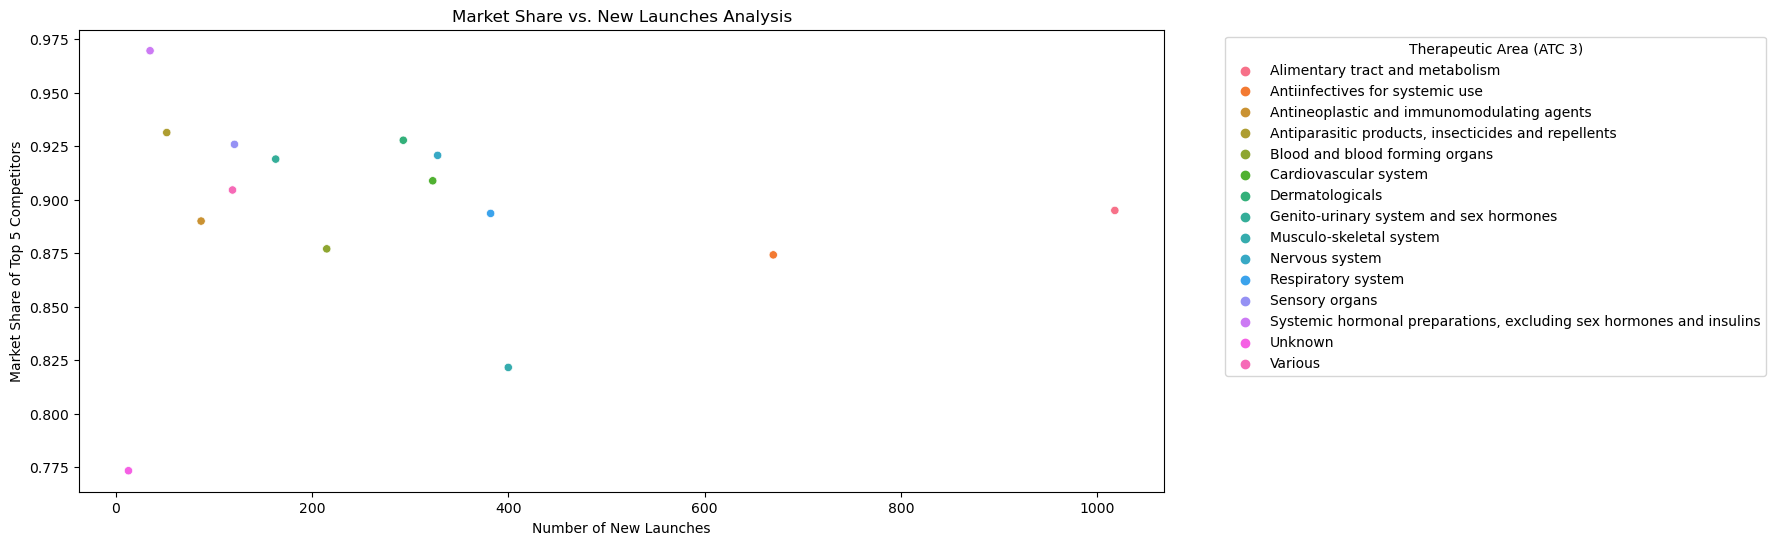

Market Share vs. New Launches Analysis:


,Therapy_Area,MS_top5_comp,new_launch
0,Alimentary tract and metabolism,0.895001,1018
1,Antiinfectives for systemic use,0.874247,670
2,Antineoplastic and immunomodulating agents,0.890039,87
3,"Antiparasitic products, insecticides and repel...",0.931373,52
4,Blood and blood forming organs,0.877058,215
5,Cardiovascular system,0.908849,323
6,Dermatologicals,0.927786,293
7,Genito-urinary system and sex hormones,0.918979,163
8,Musculo-skeletal system,0.821676,400
9,Nervous system,0.920716,328


In [22]:
market_share_vs_new_launches_analysis(df)

In [23]:

def price_vs_sales_channels_analysis(df):
    price_vs_sales_channels = df.groupby(['Therapy_Area']).agg({
        'Avg_price': 'mean',
        '%_Retail': 'mean',
        '%_Hospital': 'mean',
        '%_Tender': 'mean'
    }).reset_index()

    plt.figure(figsize=(16, 6))
    sns.pairplot(price_vs_sales_channels, hue='Therapy_Area', palette='viridis')
    plt.suptitle('Price vs. Sales Contribution by Channels Analysis', y=1.02)
    plt.show()

    print("Price vs. Sales Contribution by Channels Analysis:")
    return (price_vs_sales_channels.sort_values(by=['Therapy_Area', 'Avg_price'], ascending=[True, False]))


<Figure size 1600x600 with 0 Axes>

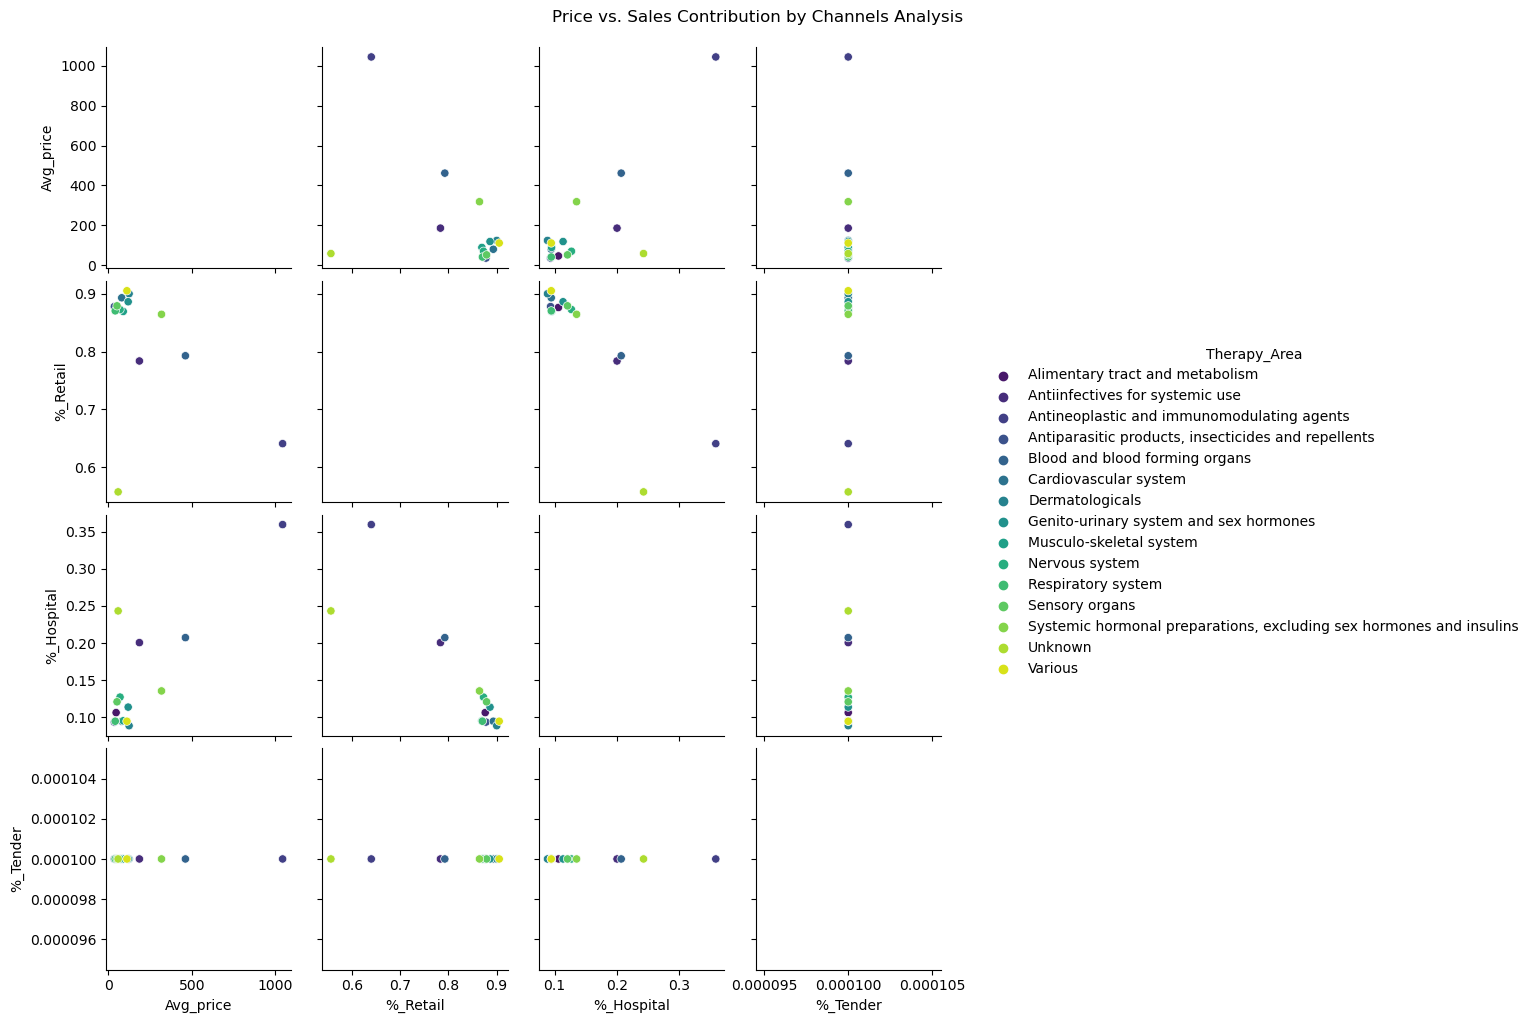

Price vs. Sales Contribution by Channels Analysis:


,Therapy_Area,Avg_price,%_Retail,%_Hospital,%_Tender
0,Alimentary tract and metabolism,46.177824,0.876501,0.106138,0.0001
1,Antiinfectives for systemic use,185.785212,0.783739,0.200472,0.0001
2,Antineoplastic and immunomodulating agents,1044.319779,0.640448,0.359552,0.0001
3,"Antiparasitic products, insecticides and repel...",35.532529,0.878045,0.093384,0.0001
4,Blood and blood forming organs,461.581630,0.792805,0.207195,0.0001
5,Cardiovascular system,79.832704,0.893292,0.094513,0.0001
6,Dermatologicals,123.964851,0.900347,0.088480,0.0001
7,Genito-urinary system and sex hormones,118.486747,0.886438,0.113562,0.0001
8,Musculo-skeletal system,88.877884,0.869616,0.095090,0.0001
9,Nervous system,69.737558,0.872943,0.127057,0.0001


In [24]:
price_vs_sales_channels_analysis(df)

In [25]:

def urban_vs_rural_growth_analysis(df):
    urban_rural_growth = df.groupby(['Therapy_Area']).agg({
        '%_Urban': 'mean',
        '%_Rural': 'mean',
        'Projected_Growth_2019_22': 'mean'
    }).reset_index()

    plt.figure(figsize=(14, 6))
    sns.scatterplot(x='%_Urban', y='%_Rural', size='Projected_Growth_2019_22', hue='Therapy_Area', data=urban_rural_growth)
    plt.xlabel('Percentage of Sales from Urban Areas')
    plt.ylabel('Percentage of Sales from Rural Areas')
    plt.title('Urban vs. Rural Sales Growth Analysis')
    plt.legend(title='Therapeutic Area (ATC 3)', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

    print("Urban vs. Rural Sales Growth Analysis:")
    return (urban_rural_growth.sort_values(by=['Therapy_Area', 'Projected_Growth_2019_22'], ascending=[True, False]))


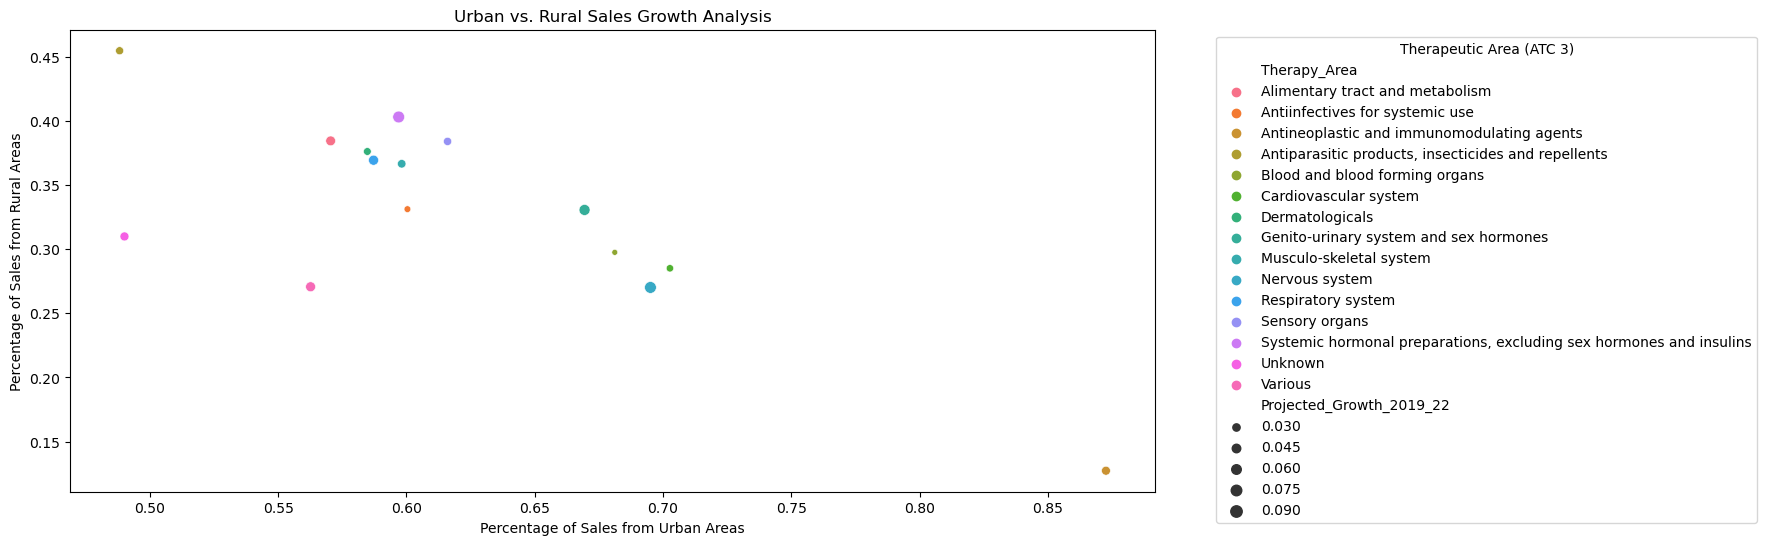

Urban vs. Rural Sales Growth Analysis:


,Therapy_Area,%_Urban,%_Rural,Projected_Growth_2019_22
0,Alimentary tract and metabolism,0.570449,0.384412,0.062423
1,Antiinfectives for systemic use,0.600385,0.331194,0.023710
2,Antineoplastic and immunomodulating agents,0.872676,0.127324,0.049705
3,"Antiparasitic products, insecticides and repel...",0.488180,0.454677,0.038807
4,Blood and blood forming organs,0.681207,0.297517,0.015539
5,Cardiovascular system,0.702708,0.285097,0.030630
6,Dermatologicals,0.584759,0.376135,0.034902
7,Genito-urinary system and sex hormones,0.669427,0.330573,0.081764
8,Musculo-skeletal system,0.598151,0.366555,0.044298
9,Nervous system,0.695111,0.270167,0.095823


In [26]:
urban_vs_rural_growth_analysis(df)

In [27]:

def atc3_analysis(df):
    atc3_analysis = df.groupby(['Therapy_Area']).agg({
        'STA_Sales_2018': 'sum',
        'Forecasted_Sales_2022': 'sum',
        'Incremental_Sales': 'sum',
        'Projected_Growth_2019_22': 'mean',
        'CAGR_Size_2015_18': 'mean',
        'No_Comp': 'sum',
        'MS_top5_comp': 'mean'
    }).reset_index()

    plt.figure(figsize=(16, 8))
    sns.barplot(x='Therapy_Area', y='STA_Sales_2018', data=atc3_analysis, color='blue', label='STA_Sales_2018')
    sns.barplot(x='Therapy_Area', y='Forecasted_Sales_2022', data=atc3_analysis, color='orange', label='Forecasted_Sales_2022')
    sns.barplot(x='Therapy_Area', y='Incremental_Sales', data=atc3_analysis, color='green', label='Incremental_Sales')
    plt.ylabel('Sales (INR in Crs.)')
    plt.title('ATC 3 Analysis - Sales, Forecasted Sales, and Incremental Sales')
    plt.legend(title='Analysis Metric', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    print("ATC 3 Analysis - Sales, Forecasted Sales, and Incremental Sales:")
    return (atc3_analysis)



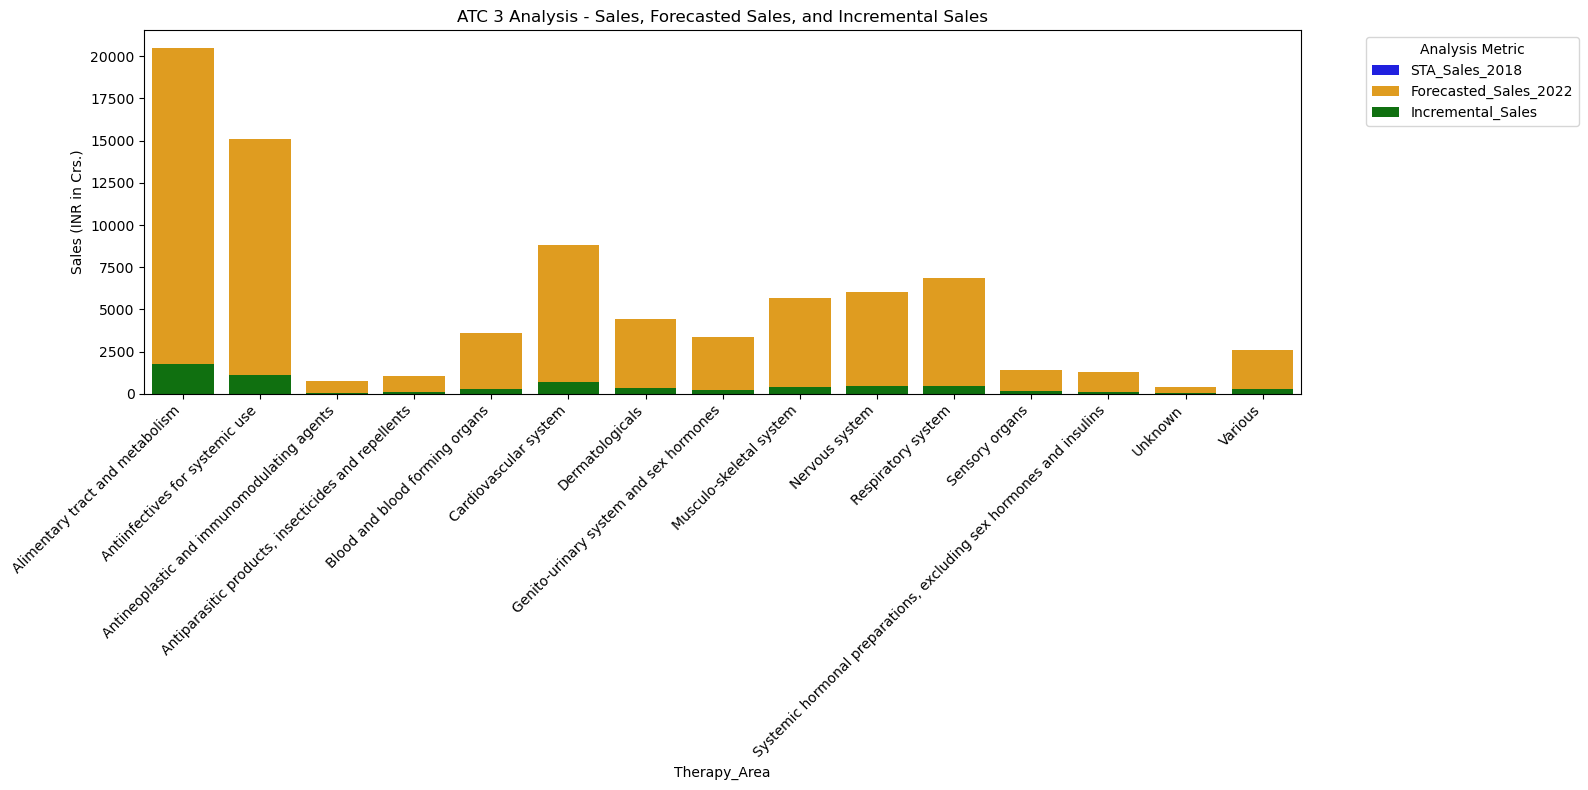

ATC 3 Analysis - Sales, Forecasted Sales, and Incremental Sales:


,Therapy_Area,STA_Sales_2018,Forecasted_Sales_2022,Incremental_Sales,Projected_Growth_2019_22,CAGR_Size_2015_18,No_Comp,MS_top5_comp
0,Alimentary tract and metabolism,13403.201755,20514.136410,1749.188089,0.062423,0.103709,6467,0.895001
1,Antiinfectives for systemic use,10677.843546,15072.409282,1089.114043,0.023710,0.127846,4621,0.874247
2,Antineoplastic and immunomodulating agents,480.827490,730.692910,26.772489,0.049705,0.140597,312,0.890039
3,"Antiparasitic products, insecticides and repel...",724.867417,1070.099859,103.037670,0.038807,0.106798,536,0.931373
4,Blood and blood forming organs,2425.951845,3575.172064,270.140872,0.015539,0.092113,1141,0.877058
5,Cardiovascular system,5731.222834,8799.858176,688.661993,0.030630,0.119082,2114,0.908849
6,Dermatologicals,2913.076050,4456.466033,354.235943,0.034902,0.068186,2128,0.927786
7,Genito-urinary system and sex hormones,2208.994818,3385.093259,229.757030,0.081764,0.152111,980,0.918979
8,Musculo-skeletal system,3812.075973,5695.303917,420.460470,0.044298,0.118884,2748,0.821676
9,Nervous system,3898.518038,6001.466591,488.916702,0.095823,0.174221,2242,0.920716


In [28]:
atc3_analysis(df)

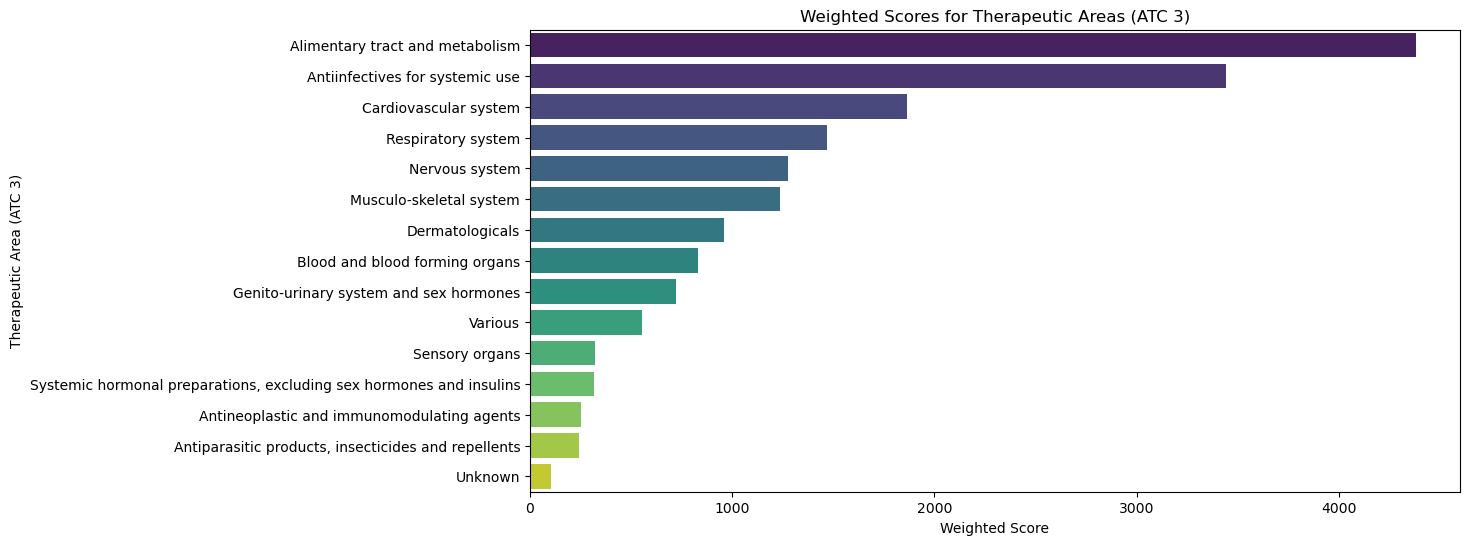

,Therapy_Area,STA_Sales_2018,Incremental_Sales,Projected_Growth_2019_22,CAGR_Size_2015_18,No_Comp,MS_top5_comp,Avg_price,Forecasted_Price_2022,Weighted_Score
0,Alimentary tract and metabolism,13403.201755,1749.188089,17.977734,0.103709,22.454861,0.895001,46.177824,54.648534,4379.758736
1,Antiinfectives for systemic use,10677.843546,1089.114043,4.504814,0.127846,24.321053,0.874247,185.785212,188.762807,3441.895257
5,Cardiovascular system,5731.222834,688.661993,5.023350,0.119082,12.890244,0.908849,79.832704,77.505981,1866.466991
10,Respiratory system,4587.862607,443.728359,7.640897,0.090289,16.747826,0.893607,40.879838,41.456480,1471.303185
9,Nervous system,3898.518038,488.916702,13.798453,0.174221,15.569444,0.920716,69.737558,80.236700,1277.795199
8,Musculo-skeletal system,3812.075973,420.460470,3.765363,0.118884,32.329412,0.821676,88.877884,91.457958,1239.007009
6,Dermatologicals,2913.076050,354.235943,6.247502,0.068186,11.888268,0.927786,123.964851,127.568567,958.977810
4,Blood and blood forming organs,2425.951845,270.140872,0.730314,0.092113,24.276596,0.877058,461.581630,466.409023,829.633555
7,Genito-urinary system and sex hormones,2208.994818,229.757030,4.824051,0.152111,16.610169,0.918979,118.486747,142.710076,723.370918
14,Various,1626.046912,269.084227,1.555662,0.089415,25.083333,0.904544,110.998322,133.126347,555.424064


In [29]:

# Therapeutic Area (ATC 3) Analysis
atc3_analysis = df.groupby('Therapy_Area').agg({
    'STA_Sales_2018': 'sum',
    'Incremental_Sales': 'sum',
    'Projected_Growth_2019_22': 'sum',
    'CAGR_Size_2015_18': 'mean',
    'No_Comp': 'mean',
    'MS_top5_comp': 'mean',
    'Avg_price': 'mean',
    'Forecasted_Price_2022': 'mean'
}).reset_index()

# Convert selected columns to numeric, handling errors
numeric_columns = ['STA_Sales_2018', 'Incremental_Sales', 'Projected_Growth_2019_22',
                   'CAGR_Size_2015_18', 'No_Comp', 'MS_top5_comp', 'Avg_price', 'Forecasted_Price_2022']

atc3_analysis[numeric_columns] = atc3_analysis[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Calculate a weighted score for each therapeutic area
weights = {
    'STA_Sales_2018': 0.3,
    'Incremental_Sales': 0.2,
    'Projected_Growth_2019_22': 0.15,
    'CAGR_Size_2015_18': 0.1,
    'No_Comp': 0.05,
    'MS_top5_comp': 0.1,
    'Avg_price': 0.05,
    'Forecasted_Price_2022': 0.05
}

atc3_analysis['Weighted_Score'] = atc3_analysis[numeric_columns].mul(weights).sum(axis=1)
atc3_analysis = atc3_analysis.sort_values(by='Weighted_Score', ascending=False)

# Identify top therapeutic areas based on the weighted score
top_atc3_areas = atc3_analysis['Therapy_Area'].head(3).tolist()

# Visualize the Weighted Scores for Therapeutic Areas
plt.figure(figsize=(12, 6))
sns.barplot(x='Weighted_Score', y='Therapy_Area', data=atc3_analysis, palette='viridis')
plt.title('Weighted Scores for Therapeutic Areas (ATC 3)')
plt.xlabel('Weighted Score')
plt.ylabel('Therapeutic Area (ATC 3)')
plt.show()


atc3_analysis


In [30]:
import pandas as pd

data = df.copy()

data = data.dropna(subset=['STA_Sales_2018']) 


data['MS_top5_comp'] = pd.to_numeric(data['MS_top5_comp'], errors='coerce')  

# Calculate competition from other players
data['top5_competition'] = 100 - data['MS_top5_comp']  

# Therapeutic Area (ATC 3) Analysis
atc3_analysis = data.groupby('GROUP').agg({
    'STA_Sales_2018': 'sum',
    'Incremental_Sales': 'sum',
    'Projected_Growth_2019_22': 'sum',
    'CAGR_Size_2015_18': 'mean',
    'No_Comp': 'mean',
    'top5_competition': 'mean',
    'Avg_price': 'mean',
    'Forecasted_Price_2022': 'mean'
}).reset_index()

numeric_columns = ['STA_Sales_2018', 'Incremental_Sales', 'Projected_Growth_2019_22',
                   'CAGR_Size_2015_18', 'No_Comp', 'top5_competition', 'Avg_price', 'Forecasted_Price_2022']

atc3_analysis[numeric_columns] = atc3_analysis[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Calculate a weighted score for each therapeutic area
weights = {
    'STA_Sales_2018': 0.3,
    'Incremental_Sales': 0.2,
    'Projected_Growth_2019_22': 0.15,
    'CAGR_Size_2015_18': 0.1,
    'No_Comp': 0.05,
    'top5_competition': 0.1,
    'Avg_price': 0.05,
    'Forecasted_Price_2022': 0.05
}

atc3_analysis['Weighted_Score'] = (atc3_analysis[numeric_columns] * weights).sum(axis=1)
atc3_analysis = atc3_analysis.sort_values(by='Weighted_Score', ascending=False)

# top therapeutic areas based on the weighted score
top_atc3_areas = atc3_analysis['GROUP'].head(3).tolist()

# Molecule (ATC 4) Analysis to analyze the high-potential molecules within the identified therapeutic areas
atc4_analysis = data[data['GROUP'].isin(top_atc3_areas)].groupby(['GROUP', 'SUBGROUP']).agg({
    'STA_Sales_2018': 'sum',
    'Incremental_Sales': 'sum',
    'Projected_Growth_2019_22': 'sum',
    'CAGR_Size_2015_18': 'mean',
    'No_Comp': 'mean',
    'top5_competition': 'mean',
    'Avg_price': 'mean',
    'Forecasted_Price_2022': 'mean'
}).reset_index()


atc4_analysis[numeric_columns] = atc4_analysis[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Calculate a weighted score for each molecule
atc4_analysis['Weighted_Score'] = (atc4_analysis[numeric_columns] * weights).sum(axis=1)
atc4_analysis = atc4_analysis.sort_values(by=['GROUP', 'Weighted_Score'], ascending=[True, False])

# top molecules within each therapeutic area
top_atc4_molecules = atc4_analysis.groupby('GROUP')['SUBGROUP'].head(3).apply(list).to_dict()

# Project the revenue for 2022 based on historical CAGR and potential contribution from identified areas

historical_cagr = 0.05  # Assuming 5% historical CAGR
revenue_2018 = 2000  # Given: 2018 revenue = INR 2000 crores

# Calculate revenue for 2022 based on historical CAGR
revenue_2022 = revenue_2018 * (1 + historical_cagr) ** 4

# Assume a conservative 10% revenue contribution from the identified areas and molecules
adjusted_revenue_2022 = revenue_2022 + (0.1 * revenue_2022)

report = f"""
Therapeutic Area (ATC 3) Analysis:
Top Attractive Therapeutic Areas:
{', '.join(top_atc3_areas)}

Molecule (ATC 4) Analysis:
Top Molecules within each Therapeutic Area:
{', '.join([f'{area}: {", ".join(molecules)}' for area, molecules in top_atc4_molecules.items()])}

Revenue Projection:
Projected Revenue in 2022 (based on historical CAGR): INR {revenue_2022:.2f} crores
Adjusted Revenue in 2022 (including potential contribution from identified areas): INR {adjusted_revenue_2022:.2f} crores
"""

print(report)



Therapeutic Area (ATC 3) Analysis:
Top Attractive Therapeutic Areas:
J01D CEPHALOSPORINS, A10B ORAL ANTIDIABETICS, A02B ANTIPEPTIC ULCERANTS

Molecule (ATC 4) Analysis:
Top Molecules within each Therapeutic Area:
0: A, 0, 2, B, 1,  , R, A, N, I, T, I, D, I, N, E,  , O, R, A, L,  , S, O, L, I, D, S, 20: A, 0, 2, B, R,  , R, A, B, E, P, R, A, ., +,  , D, O, M, P, E, R, I, D, ., 19: A, 0, 2, B, Q,  , P, A, N, T, O, P, R, ., +,  , D, O, M, P, E, R, I, D, ., 49: A, 1, 0, B, Q,  , G, L, I, M, E, P, I, R, I, D, E, +, M, E, T, F, O, R, M, ., 57: A, 1, 0, B, Y,  , D, P, P, 4,  , I, N, H, I, B, I, T, O, R,  , A, N, D,  , C, O, M, B, ., 55: A, 1, 0, B, W,  , P, I, O, G, L, I, T, A, Z, ., +, M, E, T, F, O, R, M, ., +, G, L, I, M, ., 79: J, 0, 1, D, L,  , C, E, F, I, X, I, M, E,  , O, R, A, L,  , S, O, L, ., 70: J, 0, 1, D, C,  , C, E, F, T, R, I, A, X, O, N, E,  , I, N, J, E, C, T, A, B, L, S, 89: J, 0, 1, D, V,  , C, E, F, P, O, D, O, X, I, M, E,  , S, O, L, I, D, S

Revenue Projection:
Projecte